1. Realice un programa que encuentre todas las raices de una funcion en un intervalo cerrado bajo la suposicion
de que la funcion realiza oscilaciones y entre cada oscilacion hay al menos una raiz. Ponga en practica esta funcion
y encuentre todas las raices de la siguiente funcion:
$$y(x)= cos x + \frac{6}{5} sin x^2$$
en el intervalo $(0,2\pi)$.

In [24]:
from pylab import *
%matplotlib inline

In [25]:
def raiz_bip(func,x_i,x_d,err=1e-5):
    raiz = 0.5*(x_i+x_d)
    y_i,y_d = func(x_i),func(x_d)
    n = 0
    while abs(raiz-x_d) >=err and abs(y_i-y_d) >=err:
        y_m=func(raiz)
        if y_m == 0.:
            print "end"
            break
        if y_m*y_i<0:
            x_d=raiz
        else:
            x_i=raiz
        raiz=0.5*(x_i+x_d)
        y_i,y_d=func(x_i),func(x_d)
    return raiz

In [26]:

def r_osc(func,x_i,x_d,h=1e-5):
    x_i,x_f=x_i,x_i+h
    n=0
    i=0
    while (x_f<x_d):
        y_i,y_d =func(x_i),func(x_f)
        m=y_i*y_d
        while (m>0):
            x_f=x_f+h
            if (x_f>x_d):
                i=1
                break
            y_i,y_d=func(x_i),func(x_f)
            m=y_i*y_d
        if i==1 and n>0:
            break
        if i==1:    
            print  "No hay raíz"
        else :    
            raiz=raiz_bip(func,x_i,x_f)
            n+=1
            x_i=x_f
            x_f=x_f+h
            print n, "La raiz es:",raiz
    return raiz



In [27]:
def y(x):
    return cos(x)+(6/5)*sin(x**2)

In [28]:
r_osc(y,0,2*pi)

1 La raiz es: 1.72764340954
2 La raiz es: 2.72764237061
3 La raiz es: 2.85344232179
4 La raiz es: 3.68673364252
5 La raiz es: 3.85344491243
6 La raiz es: 4.3797419693
7 La raiz es: 4.6867306314
8 La raiz es: 4.98590087004
9 La raiz es: 5.37974399044
10 La raiz es: 5.53144074093
11 La raiz es: 5.98590306543
12 La raiz es: 6.03157442499


6.031574424989654

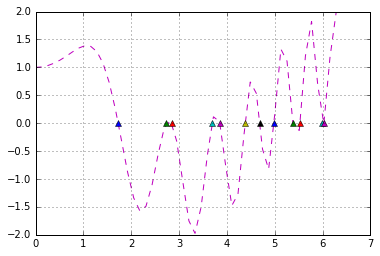

In [29]:
x=linspace(0,2*pi)
plot(x,y(x),color='m',linestyle='--')
plot([1.72764340954],[0],'^')
plot([2.72764237061],[0],'^')
plot([2.85344232179],[0],'^')
plot([3.68673364252],[0],'^')
plot([3.85344491243],[0],'^')
plot([4.3797419693],[0],'^')
plot([4.6867306314],[0],'^')
plot([4.98590087004],[0],'^')
plot([5.37974399044],[0],'^')
plot([5.53144074093],[0],'^')
plot([5.98590306543],[0],'^')
plot([6.03157442499],[0],'^')
grid(True)
show()

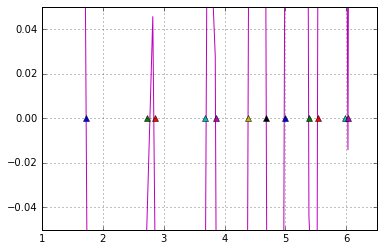

In [30]:
plot(x,y(x),color='m',linestyle='-')
plot([1.72764340954],[0],'^')
plot([2.72764237061],[0],'^')
plot([2.85344232179],[0],'^')
plot([3.68673364252],[0],'^')
plot([3.85344491243],[0],'^')
plot([4.3797419693],[0],'^')
plot([4.6867306314],[0],'^')
plot([4.98590087004],[0],'^')
plot([5.37974399044],[0],'^')
plot([5.53144074093],[0],'^')
plot([5.98590306543],[0],'^')
plot([6.03157442499],[0],'^')
xlim([1,6.5]),ylim([-.05,.05])
grid(True)
show()

2.Se tiene la siguiente función:
$$f(x,y)=2e^{-(x+1)^2}\left(e^{-(y+2)^2} + e^{-(y-2)^2}\right) + 6x(x^2 + y^2)e^{-(x^2+y^2} -1$$

Encuentre los puntos ($\hat{x},\hat{y}$) tales que $f(\hat{x},\hat{y}) = 0$ y dibuje estos puntos en el plano $xy$.

In [31]:
def f(x):
    return (2*exp(-(x[0]+1)**2))*(exp(-(x[1]+2)**2)+exp(-(x[1]-2)**2))+6*x[0]*(x[0]**2+x[1]**2)*exp(-(x[0]**2+x[1]**2))-1

In [32]:
def raiz_f(func,x_i,x_d,h=1e-5):
    x_i,x_d=array(x_i),array(x_d)
    raiz=0.5*(x_i+x_d)
    f_i,f_d=func(x_i),func(x_d)
    while abs(f_i-f_d)>=h:
        p_m=func(raiz)
        if p_m==0:
            break
        if f_i*p_m<0:
            x_d=raiz
        else:
            x_i=raiz
        raiz=0.5*(x_i+x_d)
        f_i,f_d=func(x_i),func(x_d)
    return array(raiz)

In [33]:
def r_vec(func,xy_id,h=1e-3):
    x=arange(xy_id[0],xy_id[1]+h,h)
    y=arange(xy_id[2],xy_id[3]+h,h)
    x_r=[]
    y_r=[]
    for n in xrange(len(x)-1):
        for m in xrange(len(y)-1):
            x_i=[x[m],y[n]]
            x_d=[x[m],y[n+1]]
            f_i,f_d=func(x_i),func(x_d)
            if f_i*f_d<=0:
                raiz=raiz_f(func,x_i,x_d)
                x_r.append(raiz[0])
                y_r.append(raiz[1])
    return array([x_r,y_r])

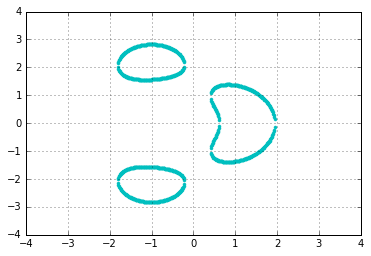

In [34]:
x_r,y_r=r_vec(f,[-4,4,-4,4],1e-2)
xlim([-4,4]), ylim([-4,4])
plot(x_r,y_r,'.',color='c')
grid(True)
show()

3.Se tiene una pelota de masa $m$ sobre un plano inclinado a un ángulo $\alpha = 15º, 30º$ y $45º$.

(a) Dibuje la trayectoria de la pelota si es lanzada desde el plano inclinado con una velocidad $v_{0x},v_{0y}>0$ considerando que hay fricción con el aire proporcional a la velocidad.

(b)Realice la misma simulación si ahora la fricción es proporcional al cuadrado de la velocidad.

(c)¿Qué sucede si ahora la pelota es lanzada con velocidad inicial $v_{0x}<0$ tal que $tan^{-1} \left( \frac{v_{0y}}{v_{0x}}\right) > \alpha$ ?

In [35]:
def rk4(ec,p_ini,x,args=0,h=0.01): 
    if (x[1]-x[0])<=5*h:
        h=(x[1]-x[0])/10
    tiempos=arange(x[0],x[1]+h,h)
    sol=zeros((len(tiempos),len(p_ini)))
    sol[0,:]=p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1=ec(sol[i,:],tiempos[i])
            k2=ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3=ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4=ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4) #cero no esta involucrado, esta en cuenta en p_ini
    else:
        for i in xrange(len(tiempos)-1):
            k1=ec(sol[i,:],tiempos[i],args)
            k2=ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3=ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4=ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

In [36]:
def rotar(theta):
    theta = theta*pi/180.
    return array([cos(theta),-sin(theta),0,0]),array([sin(theta),cos(theta),0,0]),array([0,0,cos(theta),-sin(theta)]),array([0,0,sin(theta),cos(theta)])

In [37]:
def ec_mov(r_v,t,fric=0,g=9.8,m=1):
    dx=r_v[2] 
    dy=r_v[3]
    if fric==0:
        dvx,dvy=0,-(g/m)
    else:
        dvx=-(fric([r_v[2],r_v[3]]))[0]
        dvy=-(g/m)-(fric([r_v[2],r_v[3]]))[1]
    return dot(rotar(theta),array([dx,dy,dvx,dvy]))

In [38]:
def p_inclinado(x,theta):
    return -tan(theta*pi/180)*x

In [39]:
def fricc_v(v,gamma=0.1):
    f_x = gamma*v[0]
    f_y = gamma*v[1]
    return array([f_x,f_y])

def fricc_v2(v,gamma=0.1):
    norma_v = sqrt(v[0]**2 + v[1]**2)
    f_x = gamma*norma_v*v[0]
    f_y = gamma*norma_v*v[1]
    return array([f_x,f_y])

In [40]:
def rebote(rv_i,mi_dt,fricc=0): 
    dt_b=mi_dt/2
    y_i=rv_i 
    t,sol=rk4(ec_mov,rv_i,[0,dt_b],fricc) 
    y_m=sol[-1,:]
    while abs(y_i[1])>1e-5: 
        if y_i[1]*y_m[1]<0:
            reinicio=y_i 
        else:
            reinicio=y_m 
        dt_b=dt_b/2 
        t,sol=rk4(ec_mov,reinicio,[0,dt_b],fricc)
        y_i=reinicio
        y_m=sol[-1,:]
    y_i=array([y_i[0],y_i[1],y_i[2],-y_i[3]])
    return y_i

In [41]:
def graf(c_i,theta,fricc=0,N=50,h=0.1):
    ini=c_i 
    trayectoria=zeros((N,len(ini)))
    trayectoria[0,:]=array(ini)
    mi_dt= h 
    for i in range(N-1):
        t,sol_dt=rk4(ec_mov,trayectoria[i,:],[0,mi_dt],fricc)
        if sol_dt[-1,:][1]<0: 
            punto=rebote(trayectoria[i,:],mi_dt)
            trayectoria[i+1,:]=punto
        else:
            trayectoria[i+1,:]=sol_dt[-1,:]
    for i in range(N):
        trayectoria[i,:]=dot(rotar(-theta),trayectoria[i,:])
    return trayectoria



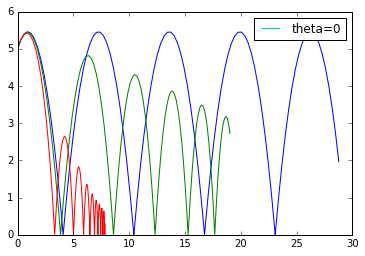

In [61]:
theta=0
fricc=[0,fricc_v,fricc_v2]
for i in xrange(len(fricc)):
    trayec=graf([0,5,3,3],theta,fricc[i],100)
    plot(trayec[:,0],trayec[:,1])
plot(trayec[:,0],p_inclinado(trayec[:,0],theta),label='theta=0')
legend()
show()

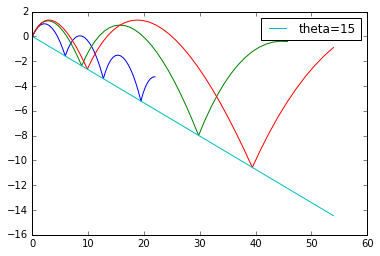

In [104]:
theta=15
v0x,v0y=[5,5]
fricc=[0,fricc_v,fricc_v2]
for i in xrange(len(fricc)):
    trayec=graf([0,0,v0x,v0y],theta,fricc[2-i],50)
    plot(trayec[:,0],trayec[:,1])
plot(trayec[:,0],p_inclinado(trayec[:,0],theta),label='theta=15')
legend()
show()

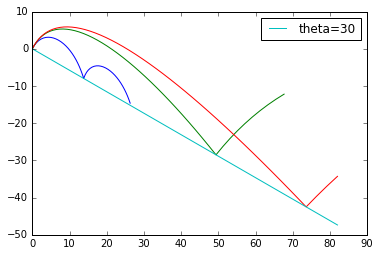

In [109]:
theta=30
v0x,v0y=[5,10]
fricc=[0,fricc_v,fricc_v2]
for i in xrange(len(fricc)):
    trayec=graf([0,0,v0x,v0y],theta,fricc[2-i],50)
    plot(trayec[:,0],trayec[:,1])
plot(trayec[:,0],p_inclinado(trayec[:,0],theta),label='theta=30')
legend()
show()

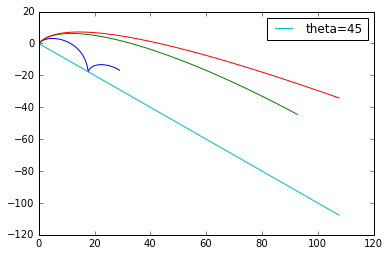

In [111]:
theta=45
fricc=[0,fricc_v,fricc_v2]
v0x,v0y=[5,10]
fricc=[0,fricc_v,fricc_v2]
for i in xrange(len(fricc)):
    trayec=graf([0,0,v0x,v0y],theta,fricc[2-i],50)
    plot(trayec[:,0],trayec[:,1])
plot(trayec[:,0],p_inclinado(trayec[:,0],theta),label='theta=45')
legend()
show()

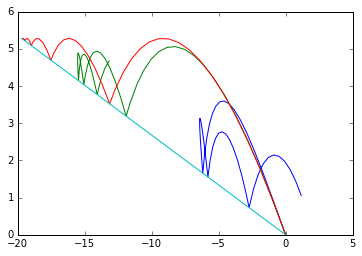

In [58]:
theta=15
#theta<(tan(v0y/v0x))**-1
v0x,v0y=[-10,10]
fricc=[0,fricc_v,fricc_v2]
for i in xrange(len(fricc)):
    trayec=graf([0,0,v0x,v0y],theta,fricc[2-i],50)
    plot(trayec[:,0],trayec[:,1])
plot(trayec[:,0],p_inclinado(trayec[:,0],theta))
show()

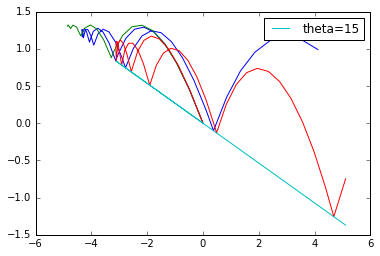

In [102]:
theta=15
#theta<(tan(v0y/v0x))**-1
v0x,v0y=[-5,5]
fricc=[0,fricc_v,fricc_v2]
for i in xrange(len(fricc)):
    trayec=graf([0,0,v0x,v0y],theta,fricc[3/2-i],50)
    plot(trayec[:,0],trayec[:,1])
plot(trayec[:,0],p_inclinado(trayec[:,0],theta),label='theta=15')
legend()
show()

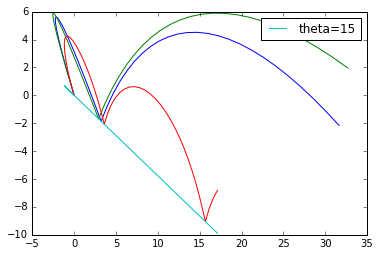

In [124]:
theta=30
#theta<(tan(v0y/v0x))**-1
v0x,v0y=[-5,10]
fricc=[0,fricc_v,fricc_v2]
for i in xrange(len(fricc)):
    trayec=graf([0,0,v0x,v0y],theta,fricc[3/2-i],50)
    plot(trayec[:,0],trayec[:,1])
plot(trayec[:,0],p_inclinado(trayec[:,0],theta),label='theta=15')
legend()
show()

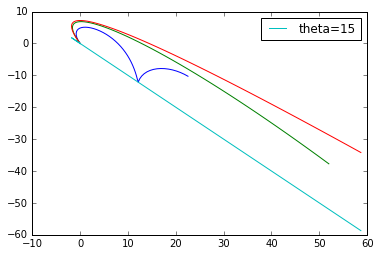

In [125]:
theta=45
#theta<(tan(v0y/v0x))**-1
v0x,v0y=[-5,10]
fricc=[0,fricc_v,fricc_v2]
for i in xrange(len(fricc)):
    trayec=graf([0,0,v0x,v0y],theta,fricc[2-i],50)
    plot(trayec[:,0],trayec[:,1])
plot(trayec[:,0],p_inclinado(trayec[:,0],theta),label='theta=15')
legend()
show()